In [1]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

 
cricket is more than just a sport; it's a passion for millions around the world.
from thrilling world cup matches to local street games, cricket brings people together.
i enjoy watching fast bowlers challenge skilled batsmen with pace and swing.
the strategies used in test matches are fascinating and require great mental strength.
cricket has evolved with technology, from decision reviews to smart wearables tracking player performance.
it's a beautiful game that blends tradition with innovation.
 
cricket is more than just a sport its a passion for millions around the world
from thrilling world cup matches to local street games cricket brings people together
i enjoy watching fast bowlers challenge skilled batsmen with pace and swing
the strategies used in test matches are fascinating and require great mental strength
cricket has evolved with technology from decision reviews to smart wearables tracking player performance
its a beautiful game that blends tradition with innovation
 
['c

Matplotlib is building the font cache; this may take a moment.


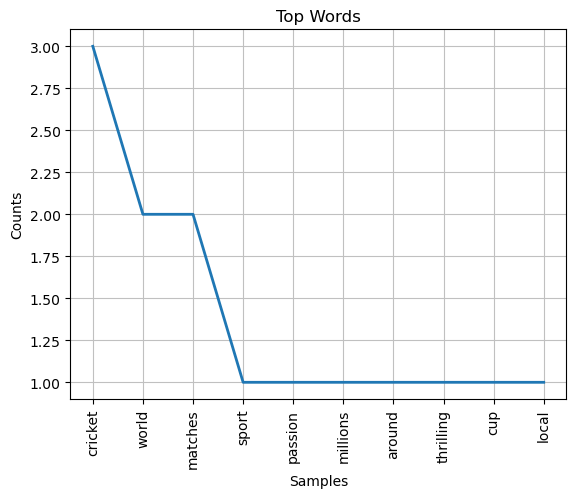

<Axes: title={'center': 'Top Words'}, xlabel='Samples', ylabel='Counts'>

In [3]:
import string
paragraph = """Cricket is more than just a sport; it's a passion for millions around the world.
From thrilling World Cup matches to local street games, cricket brings people together.
I enjoy watching fast bowlers challenge skilled batsmen with pace and swing.
The strategies used in test matches are fascinating and require great mental strength.
Cricket has evolved with technology, from decision reviews to smart wearables tracking player performance.
It's a beautiful game that blends tradition with innovation."""
print(" ")

#part 1
paragraph_lower = paragraph.lower()
print(paragraph_lower)
print(" ")
paragraph_no_punct = paragraph_lower.translate(str.maketrans('', '', string.punctuation))
print(paragraph_no_punct)

#part 2
print(" ")
words = word_tokenize(paragraph_no_punct)
print(words)
print(" ")
sentence = sent_tokenize(paragraph_no_punct)
print(sentence)

#part 3
print(" ")
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.casefold() not in stop_words]
print(filtered_words)

#part 4
print(" ")
fd = FreqDist(filtered_words)
print(fd.most_common(10))
fd.plot(10, title = "Top Words", cumulative=False)

In [5]:
import pandas as pd

print(filtered_words)
print(" ")

ps = PorterStemmer()
ls = LancasterStemmer()
lm = WordNetLemmatizer()
data = []
for word in filtered_words:
  porter_stemmer = ps.stem(word)
  lancaster_stemmer = ls.stem(word)
  lemmatizer = lm.lemmatize(word)
  data.append([word, porter_stemmer, lancaster_stemmer, lemmatizer])

df = pd.DataFrame(data, columns=["Word", "PorterStemmed Word", "LancasterStemmed Word", "Lemmatizer Word"])
display(df)

['cricket', 'sport', 'passion', 'millions', 'around', 'world', 'thrilling', 'world', 'cup', 'matches', 'local', 'street', 'games', 'cricket', 'brings', 'people', 'together', 'enjoy', 'watching', 'fast', 'bowlers', 'challenge', 'skilled', 'batsmen', 'pace', 'swing', 'strategies', 'used', 'test', 'matches', 'fascinating', 'require', 'great', 'mental', 'strength', 'cricket', 'evolved', 'technology', 'decision', 'reviews', 'smart', 'wearables', 'tracking', 'player', 'performance', 'beautiful', 'game', 'blends', 'tradition', 'innovation']
 


,Word,PorterStemmed Word,LancasterStemmed Word,Lemmatizer Word
0,cricket,cricket,cricket,cricket
1,sport,sport,sport,sport
2,passion,passion,pass,passion
3,millions,million,mil,million
4,around,around,around,around
5,world,world,world,world
6,thrilling,thrill,thrilling,thrilling
7,world,world,world,world
8,cup,cup,cup,cup
9,matches,match,match,match


In [7]:
paragraph = """Cricket is more than just a sport; it's a passion for millions around the world.
From thrilling World Cup matches to local street games, cricket brings people together.
I enjoy watching fast bowlers challenge skilled batsmen with pace and swing.
The strategies used in test matches are fascinating and require great mental strength.
Cricket has evolved with technology, from decision reviews to smart wearables tracking player performance.
It's a beautiful game that blends tradition with innovation."""

print(paragraph)

#Que2(part a)
print(" ")
words_more_than_5 = re.findall(r'\b[a-zA-Z]{6,}\b', paragraph)

#b.
numbers = re.findall(r'\b\d+\b', paragraph)

#c.
capitalized_words = re.findall(r'\b[A-Z][a-z]*\b', paragraph)

#Que3(part a)
alphabetic_words = re.findall(r'\b[a-zA-Z]+\b', paragraph)

#b.
vowel_words = re.findall(r'\b[aeiouAEIOU]\w*\b', paragraph)

print("Words with more than 5 letters:\n", words_more_than_5, "\n")
print("Numbers :\n", numbers, "\n")
print("Capitalized Words:\n", capitalized_words, "\n")
print("Alphabetic Words Only:\n", alphabetic_words, "\n")
print("Words Starting with a Vowel:\n", vowel_words)

Cricket is more than just a sport; it's a passion for millions around the world.
From thrilling World Cup matches to local street games, cricket brings people together.
I enjoy watching fast bowlers challenge skilled batsmen with pace and swing.
The strategies used in test matches are fascinating and require great mental strength.
Cricket has evolved with technology, from decision reviews to smart wearables tracking player performance.
It's a beautiful game that blends tradition with innovation.
 
Words with more than 5 letters:
 ['Cricket', 'passion', 'millions', 'around', 'thrilling', 'matches', 'street', 'cricket', 'brings', 'people', 'together', 'watching', 'bowlers', 'challenge', 'skilled', 'batsmen', 'strategies', 'matches', 'fascinating', 'require', 'mental', 'strength', 'Cricket', 'evolved', 'technology', 'decision', 'reviews', 'wearables', 'tracking', 'player', 'performance', 'beautiful', 'blends', 'tradition', 'innovation'] 

Numbers :
 [] 

Capitalized Words:
 ['Cricket', 'F

In [9]:
print(paragraph)
print(" ")
#part2
pattern  = r"\b\w+(?:-\w+)*\b|\d+\.\d+|\w+'\w+"
tokens = re.findall(pattern, paragraph)
print(tokens)
print(" ")

sample = "Contact us at support@cricketworld.org or visit https://cricketworld.org/news. Call +44 123-456-7890 today!"
print(sample)
sample = re.sub(r'\S+@\S+','',sample)
sample = re.sub(r'(?:\+?\d{1,3}[-.\s]?)??[-.\s]?\d{3}[-.\s]?\d{4}','', sample)
sample = re.sub(r'https?://(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b(?:[-a-zA-Z0-9()@:%_+.~#?&/=]*)', '', sample)
print(" ")
print(sample)

Cricket is more than just a sport; it's a passion for millions around the world.
From thrilling World Cup matches to local street games, cricket brings people together.
I enjoy watching fast bowlers challenge skilled batsmen with pace and swing.
The strategies used in test matches are fascinating and require great mental strength.
Cricket has evolved with technology, from decision reviews to smart wearables tracking player performance.
It's a beautiful game that blends tradition with innovation.
 
['Cricket', 'is', 'more', 'than', 'just', 'a', 'sport', 'it', 's', 'a', 'passion', 'for', 'millions', 'around', 'the', 'world', 'From', 'thrilling', 'World', 'Cup', 'matches', 'to', 'local', 'street', 'games', 'cricket', 'brings', 'people', 'together', 'I', 'enjoy', 'watching', 'fast', 'bowlers', 'challenge', 'skilled', 'batsmen', 'with', 'pace', 'and', 'swing', 'The', 'strategies', 'used', 'in', 'test', 'matches', 'are', 'fascinating', 'and', 'require', 'great', 'mental', 'strength', 'Cricke